In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
physical_devices = tf.config.list_physical_devices('GPU')
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)
sns.set(rc={'figure.figsize':(9,5)})
def model_weight_hist(model_path_list, label_list, save_file):
    assert len(model_path_list) == len(label_list)
    weight_arr = []
    legend_arr = []
    for idx in range(len(model_path_list)):
        model = tf.keras.models.load_model(model_path_list[idx])
        weights = filter(lambda x: 'kernel' in x.name, model.weights)
        weights = list(map(lambda x: x.numpy().reshape(-1), weights))
        weights = np.concatenate(weights)
        weight_arr.extend(weights)
        legend_arr.extend([label_list[idx] for _ in range(len(weights))])

    df = pd.DataFrame({
        'weight': weight_arr,
        'Config': legend_arr
    })
    
    plot = sns.kdeplot(
        data=df, x="weight", hue="Config", fill=False, common_norm=False
    )
    plot.set(xlim=(-1, 1), xlabel='Weight', ylabel='Probability Density')
    plot.set_title('Weight Distribution of Small CNN (~15K Parameters)')
    #plt.show()
    plt.subplots_adjust(left=0.08, bottom=0.10, right=0.98, top=0.93)
    plt.savefig('./smallcnnweightdist.png')

models = ['smallcnnckpt/4e-4rr1/ckpt199', 'smallcnnckpt/4e-4rf1/ckpt199', 'smallcnnckpt/4e-4fr1/ckpt199', 'smallcnnckpt/4e-4ff1/ckpt199']
labels = ['Random inits, random batches', 'Random inits, fixed batches', 'Fixed inits, random batches', 'Fixed inits, fixed batches']
    
#model_weight_hist(models, labels, '')

In [2]:
rr = np.load('./resnetckpt/logs_4e-4rr/save.npy')
rf = np.load('./resnetckpt/logs_4e-4rf/save.npy')
fr = np.load('./resnetckpt/logs_4e-4fr/save.npy')
ff = np.load('./resnetckpt/logs_4e-4ff/save.npy')

In [3]:
df = pd.DataFrame({
        'weight': np.concatenate([rr, rf, fr, ff]),
        'Config': ['Random inits, random batches' for _ in range(len(rr))] + 
                                ['Random inits, fixed batches' for _ in range(len(rf))] + 
                                ['Fixed inits, random batches' for _ in range(len(fr))] + 
                                ['Fixed inits, fixed batches' for _ in range(len(ff))]
    })



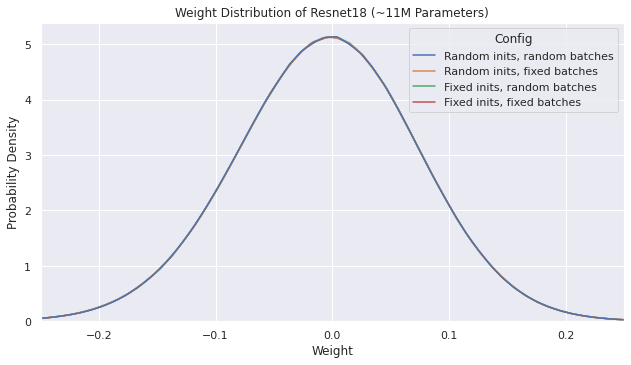

In [11]:
plot = sns.kdeplot(
    data=df, x="weight", hue="Config", fill=False, common_norm=False
)
plot.set(xlim=(-0.25, 0.25), xlabel='Weight', ylabel='Probability Density')
plot.set_title('Weight Distribution of Resnet18 (~11M Parameters)')
plt.subplots_adjust(left=0.08, bottom=0.10, right=0.98, top=0.93)
plt.savefig('./resnet18weightdist.png')

<Figure size 648x360 with 0 Axes>

<AxesSubplot:title={'center':'Weight Distribution of Resnet18 (~11M Parameters)'}, xlabel='Weight', ylabel='Probability Density'>